Import The required Libraries

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import json
from zipfile import ZipFile
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers,models

Installing Kaggle

In [42]:
!pip install kaggle

In [43]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

Loading Kaggle Token

In [44]:
kaggle_json_path=json.load(open('/content/kaggle.json'))

In [45]:
os.environ['KAGGLE_USERNAME']=kaggle_json_path['username']
os.environ['KAGGLE_KEY']=kaggle_json_path['key']

In [46]:
!kaggle datasets download -d bmadushanirodrigo/fracture-multi-region-x-ray-data


Dataset URL: https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data
License(s): ODC Public Domain Dedication and Licence (PDDL)
fracture-multi-region-x-ray-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
with ZipFile('/content/fracture-multi-region-x-ray-data.zip','r') as zip:

  zip.extractall()

In [48]:
print(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification'))

['val', 'train', 'test']


In [49]:


print(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train'))

['fractured', 'not fractured']


In [50]:
print(len(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train')))

2


In [51]:
print(len(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured')))

4606


In [52]:
print(len(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured')))

4640


In [53]:
print("len of training dataset is:",4606+4640)

len of training dataset is: 9246


In [54]:
print(len(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured')))

238


In [55]:
print(len(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured')))

268


In [56]:
print("len of the testing dataset is:",238+268)

len of the testing dataset is: 506


In [57]:
train_data = '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured'

Plotting Section

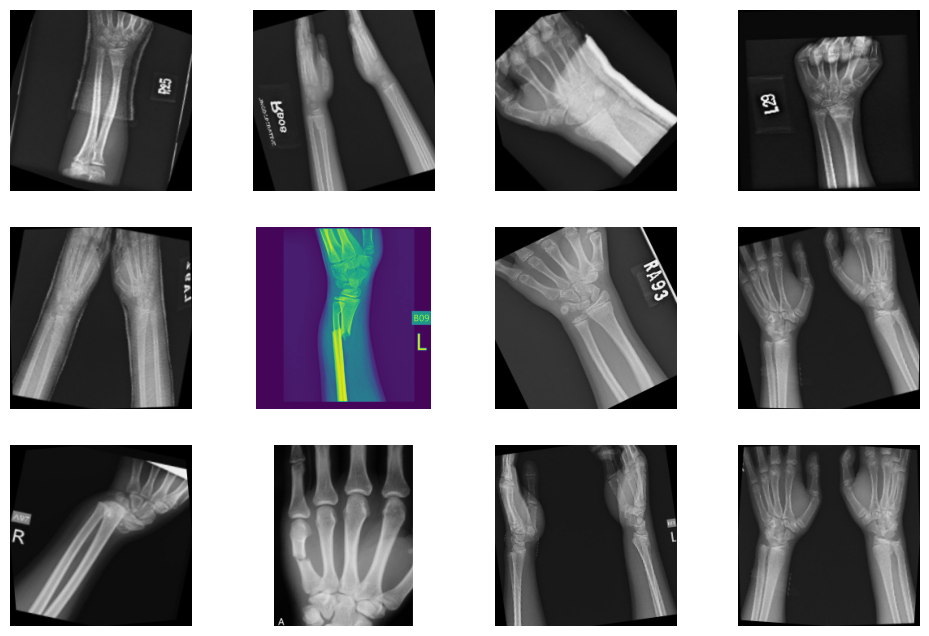

In [58]:
# prompt: show 12 images of the training dataset

import matplotlib.pyplot as plt
import os

# Assuming your images are in /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train
  # Replace with the actual path

# Get a list of image files
image_files = [f for f in os.listdir(train_data) if os.path.isfile(os.path.join(train_data, f))]

# Display the first 12 images
plt.figure(figsize=(12, 8))
for i in range(min(12, len(image_files))):
    img_path = os.path.join(train_data, image_files[i])
    img = plt.imread(img_path)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [59]:
test_data = '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured'

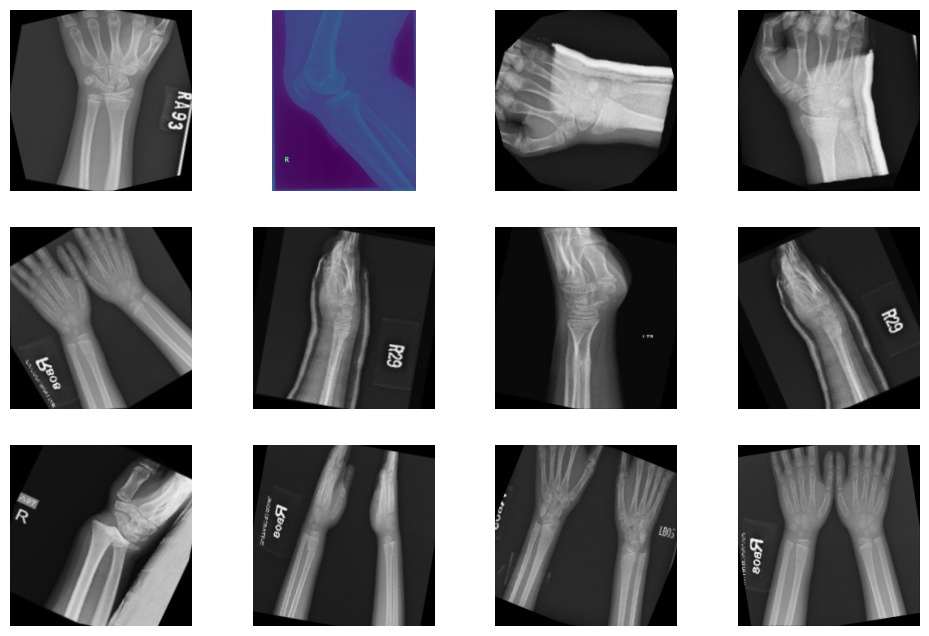

In [60]:
# prompt: for testing also

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# Get a list of image files
image_files = [f for f in os.listdir(test_data) if os.path.isfile(os.path.join(test_data, f))]

# Display the first 12 images
plt.figure(figsize=(12, 8))
for i in range(min(12, len(image_files))):
    img_path = os.path.join(test_data, image_files[i])
    try:
      img = plt.imread(img_path)
      plt.subplot(3, 4, i + 1)
      plt.imshow(img)
      plt.axis('off')
    except Exception as e:
      print(f"Error loading image {img_path}: {e}")
plt.show()

In [61]:
val_data='/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val'

In [62]:
x=len(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured'))
y=len(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured'))

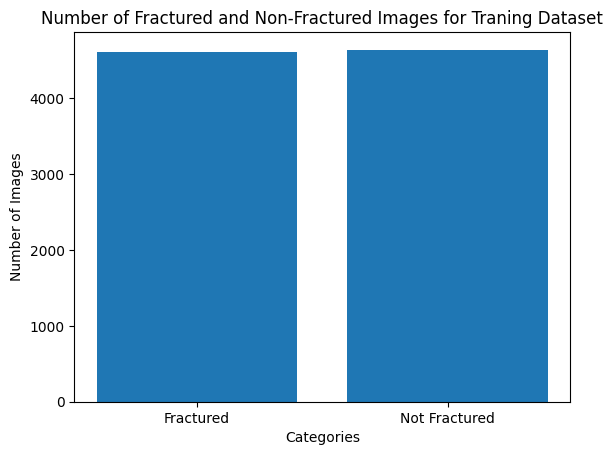

In [63]:


categories = ['Fractured', 'Not Fractured']
values = [x, y]

plt.bar(categories, values)
plt.xlabel("Categories")
plt.ylabel("Number of Images")
plt.title("Number of Fractured and Non-Fractured Images for Traning Dataset")
plt.show()

In [64]:
X=len(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured'))

In [65]:
Y=len(os.listdir('/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured'))

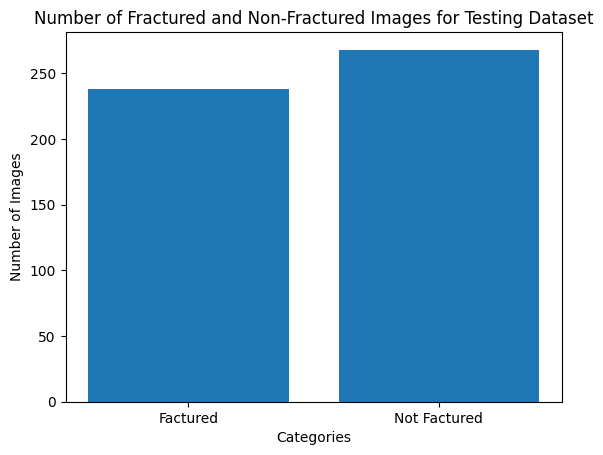

In [66]:
categories=['Factured','Not Factured']
values=[X,Y]

plt.bar(categories,values)
plt.xlabel("Categories")
plt.ylabel("Number of Images")
plt.title("Number of Fractured and Non-Fractured Images for Testing Dataset")
plt.show()

In [67]:
img_size=256
batch_size=32

Set up the Data generators

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import the correct ImageDataGenerator class

In [69]:
# prompt: rescale the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for rescaling

datagen = ImageDataGenerator(rescale=1./255)

# Define image size and batch size
img_size = 256
batch_size = 32

# Flow from directory with rescaling
train_ds = datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'  # Use binary for binary classification
)

test_ds = datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

val_ds = datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 9246 images belonging to 2 classes.
Found 506 images belonging to 2 classes.
Found 829 images belonging to 2 classes.


Finding the Training baches and testing Batches

In [70]:
import tensorflow as tf
print('Number of training batches: %d' % (len(train_ds)))
print('Number of testing batches: %d' % (len(test_ds)))

Number of training batches: 289
Number of testing batches: 16


Define The Model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [72]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 128)      

In [74]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [75]:


import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="PIL")


In [76]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
289/289 [==============================] - 180s 617ms/step - loss: 0.3532 - accuracy: 0.8360 - val_loss: 0.2440 - val_accuracy: 0.9095
Epoch 2/10
289/289 [==============================] - 178s 616ms/step - loss: 0.0564 - accuracy: 0.9818 - val_loss: 0.1236 - val_accuracy: 0.9457
Epoch 3/10
289/289 [==============================] - 177s 611ms/step - loss: 0.0275 - accuracy: 0.9893 - val_loss: 0.1150 - val_accuracy: 0.9626
Epoch 4/10
289/289 [==============================] - 175s 606ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0559 - val_accuracy: 0.9819
Epoch 5/10
289/289 [==============================] - 177s 611ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.1103 - val_accuracy: 0.9710
Epoch 6/10
289/289 [==============================] - 174s 602ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0735 - val_accuracy: 0.9747
Epoch 7/10
289/289 [==============================] - 174s 603ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0648 -

In [77]:
test_loss,test_acc=model.evaluate(test_ds)

16/16 [==============================] - 4s 265ms/step - loss: 0.0598 - accuracy: 0.9921


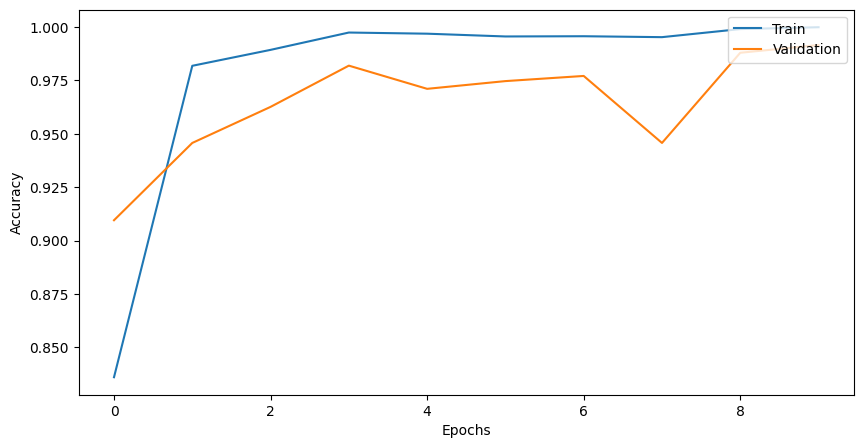

In [78]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validaiton Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

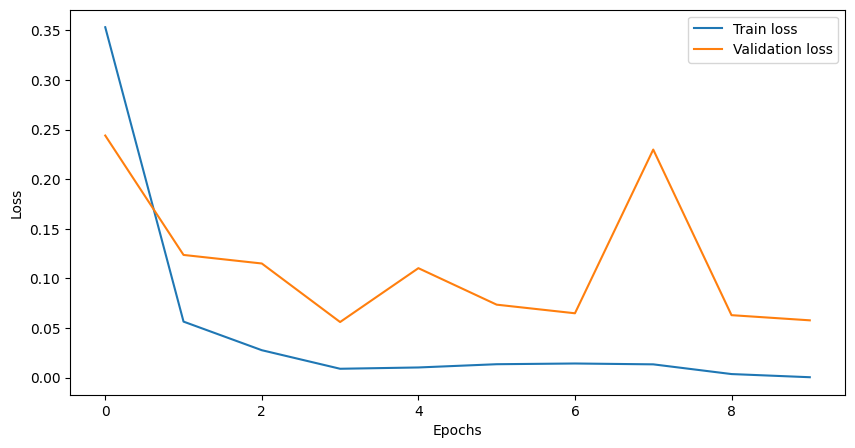

In [79]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validaiton Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train loss','Validation loss'],loc='upper right')
plt.show()